In [69]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [93]:
df = pd.read_csv("data/house_prices.csv")

In [94]:
df.shape

(1460, 81)

In [95]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [96]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [97]:
X = df.values

In [98]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [99]:
non_numeric_cols = df.select_dtypes(exclude=[np.number]).columns

In [103]:
non_numeric_cols.shape

(43,)

In [104]:
df_numeric = df.drop(columns=non_numeric_cols)

In [107]:
df_numeric.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [131]:
df_numeric.shape

(1460, 38)

In [160]:
df_numeric.dropna(inplace=True)

In [220]:
labels = df_numeric["SalePrice"]

In [224]:
df_numeric.drop(["SalePrice"], axis=1, inplace=True)

In [229]:
X = df_numeric.values

In [230]:
scaler = StandardScaler()

In [231]:
X_scaled = scaler.fit_transform(X)

In [232]:
X_scaled

array([[-1.72580691,  0.09229529, -0.23357027, ..., -0.14140664,
        -1.61534509,  0.15308355],
       [-1.72342925, -0.86569565,  0.38483378, ..., -0.14140664,
        -0.49871497, -0.59629052],
       [-1.72105159,  0.09229529, -0.10988946, ..., -0.14140664,
         0.99012519,  0.15308355],
       ...,
       [ 1.73844606,  0.33179303, -0.19234334, ..., 14.94738799,
        -0.49871497,  1.65183171],
       [ 1.74082372, -0.86569565, -0.10988946, ..., -0.14140664,
        -0.87092501,  1.65183171],
       [ 1.74320138, -0.86569565,  0.17869909, ..., -0.14140664,
        -0.12650493,  0.15308355]])

In [233]:
cov_matrix = np.cov(X_scaled, rowvar=False)

In [234]:
cov_matrix

array([[ 1.00089286e+00,  2.19570656e-02, -1.33004348e-02, ...,
         4.58399916e-02, -5.70377412e-04,  1.34186136e-02],
       [ 2.19570656e-02,  1.00089286e+00, -3.87285055e-01, ...,
        -4.07250021e-02, -2.71946418e-02, -1.24589432e-02],
       [-1.33004348e-02, -3.87285055e-01,  1.00089286e+00, ...,
         1.47205086e-03,  1.88313334e-02,  1.32789166e-02],
       ...,
       [ 4.58399916e-02, -4.07250021e-02,  1.47205086e-03, ...,
         1.00089286e+00,  2.00849786e-02,  3.41365311e-02],
       [-5.70377412e-04, -2.71946418e-02,  1.88313334e-02, ...,
         2.00849786e-02,  1.00089286e+00, -1.50711056e-01],
       [ 1.34186136e-02, -1.24589432e-02,  1.32789166e-02, ...,
         3.41365311e-02, -1.50711056e-01,  1.00089286e+00]])

In [235]:
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

In [236]:
eigenvalues

array([-6.35674934e-16, -5.64607328e-16,  1.03816125e-01,  1.20983035e-01,
        1.41362270e-01,  1.74763290e-01,  2.05518560e-01,  2.50064734e-01,
        2.61835645e-01,  3.09921470e-01,  3.79108617e-01,  3.88666788e-01,
        4.70638034e-01,  5.28738026e-01,  6.02694558e-01,  6.45487783e-01,
        6.85225790e-01,  7.46917165e-01,  7.62354586e-01,  7.89561893e-01,
        8.42468163e-01,  8.92281098e-01,  9.15330184e-01,  9.23529989e-01,
        1.02504068e+00,  1.03645740e+00,  1.07465358e+00,  1.10585208e+00,
        1.13016089e+00,  1.14200795e+00,  1.22406819e+00,  1.25840387e+00,
        1.51945851e+00,  2.04011056e+00,  2.70573401e+00,  3.16133329e+00,
        7.46848691e+00])

In [237]:
sorted_indices = np.argsort(eigenvalues)[::-1]

In [238]:
eigenvalues = eigenvalues[sorted_indices]

In [239]:
eigenvectors = eigenvectors[:, sorted_indices]

In [240]:
eigenvectors.shape

(37, 37)

In [241]:
eigenvalues

array([ 7.46848691e+00,  3.16133329e+00,  2.70573401e+00,  2.04011056e+00,
        1.51945851e+00,  1.25840387e+00,  1.22406819e+00,  1.14200795e+00,
        1.13016089e+00,  1.10585208e+00,  1.07465358e+00,  1.03645740e+00,
        1.02504068e+00,  9.23529989e-01,  9.15330184e-01,  8.92281098e-01,
        8.42468163e-01,  7.89561893e-01,  7.62354586e-01,  7.46917165e-01,
        6.85225790e-01,  6.45487783e-01,  6.02694558e-01,  5.28738026e-01,
        4.70638034e-01,  3.88666788e-01,  3.79108617e-01,  3.09921470e-01,
        2.61835645e-01,  2.50064734e-01,  2.05518560e-01,  1.74763290e-01,
        1.41362270e-01,  1.20983035e-01,  1.03816125e-01, -5.64607328e-16,
       -6.35674934e-16])

In [242]:
def pca(X_scaled, eigenvectors, eigenvalues, k=2):
    sort_indices = np.argsort(eigenvalues)[::-1]
    desc_eigenvalues, desc_eigenvectors = eigenvalues[sort_indices], eigenvectors[sort_indices]
    X_pca = X_scaled.dot(desc_eigenvectors[:, :k])
    if k == 1:
        plt.hlines(1,1,20)  # Draw a horizontal line
        plt.eventplot(X_pca.flatten(), orientation='horizontal', colors='b')
        plt.axis('off')
        plt.show()
    elif k == 2:
        plt.scatter(X_pca[:, 0], X_pca[:, 1])
        plt.xlabel("PC1")
        plt.xlabel("PC2")
        plt.show()
    elif k == 3:
        from mpl_toolkits.mplot3d import Axes3D
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2])
        ax.set_xlabel('PC1')
        ax.set_ylabel('PC2')
        ax.set_zlabel('PC3')
        plt.show()
        
    return X_pca

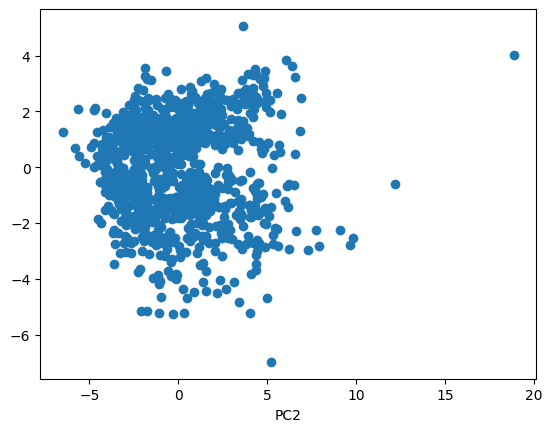

In [243]:
X_pca = pca(X_scaled, eigenvectors, eigenvalues, 2)